# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

**Note:** This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Dandiset Overview

This Dandiset contains data from the Allen Institute Openscope - Sequence Learning Project. The project investigates predictive coding in the neocortex of head-fixed mice passively viewing sequences of natural movie clips. The data includes two-photon calcium imaging from multiple cortical areas (V1, LM, AM, PM) and layers (L2/3 and L4), as well as running wheel data.

You can find the Dandiset here: https://dandiarchive.org/dandiset/000617/0.250312.0130

## Notebook Contents

This notebook will guide you through:
1. Connecting to the DANDI archive and exploring the Dandiset.
2. Loading a specific NWB file from the Dandiset.
3. Examining the structure and contents of the NWB file.
4. Visualizing calcium imaging data.
5. Visualizing running behavior data.
6. Visualizing segmented ROIs.
7. Summarizing findings and suggesting future analysis directions.

## Required Packages

This notebook requires the following Python packages:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`
- `pandas`

## Loading the Dandiset

We will use the `dandi` Python client to connect to the DANDI archive and access the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000617", "0.250312.0130")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


## Loading an NWB file

We will load one of the NWB files from the Dandiset to explore its contents. As the Dandiset contains both raw movie data and processed ophys data in separate NWB files, we will focus on an NWB file containing processed ophys data, which is typically smaller and easier to work with for analysis demonstrations.
For this example, we will load the file `sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb` with asset ID `27dd7936-b3e7-45af-aca0-dc98b5954d19`. This file contains processed calcium imaging data from the VISp brain region at a depth of 175 um.

In [2]:
import pynwb
import h5py
import pandas as pd
import remfile

# Define the NWB file URL
nwb_url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
asset_id = "27dd7936-b3e7-45af-aca0-dc98b5954d19" # This is specified in the task and should be hard-coded

# Load the NWB file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject genotype: {nwb.subject.genotype}")

NWB file identifier: 1280384858
Session description: Ophys Session
Subject ID: 677038
Subject genotype: Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt


## Exploring NWB File Structure

We can explore the hierarchical structure of the NWB file to see the available data interfaces and their organization.

In [3]:
# Explore the structure of the NWB file
print("NWB file contents:")
print("- acquisition:")
for key in nwb.acquisition.keys():
    print(f"  - {key}")
print("- stimulus_template:")
for key in nwb.stimulus_template.keys():
    print(f"  - {key}")
print("- processing:")
for module_name in nwb.processing.keys():
    print(f"  - {module_name}:")
    for interface_name in nwb.processing[module_name].data_interfaces.keys():
        print(f"    - {interface_name}")
print("- intervals:")
for key in nwb.intervals.keys():
    print(f"  - {key}")
print("- lab_meta_data:")
for key in nwb.lab_meta_data.keys():
    print(f"  - {key}")
print("- devices:")
for key in nwb.devices.keys():
    print(f"  - {key}")
print("- imaging_planes:")
for key in nwb.imaging_planes.keys():
    print(f"  - {key}")
# Add other top-level attributes you might want to explore
print(f"- subject: {nwb.subject.subject_id}")
print(f"- session_description: {nwb.session_description}")
print(f"- identifier: {nwb.identifier}")

NWB file contents:
- acquisition:
  - v_in
  - v_sig
- stimulus_template:
  - gray
  - movie_clip_A
  - movie_clip_B
  - movie_clip_C
- processing:
  - ophys:
    - corrected_fluorescence
    - dff
    - event_detection
    - image_segmentation
    - images
    - neuropil_trace
    - ophys_motion_correction_x
    - ophys_motion_correction_y
  - running:
    - dx
    - speed
    - speed_unfiltered
  - stimulus:
    - timestamps
  - stimulus_ophys:
    - timestamps
- intervals:
  - gray_presentations
  - movie_clip_A_presentations
  - movie_clip_B_presentations
  - movie_clip_C_presentations
- lab_meta_data:
  - metadata
- devices:
  - MESO.2
- imaging_planes:
  - imaging_plane_1
- subject: 677038
- session_description: Ophys Session
- identifier: 1280384858


## NWB File Contents Overview

This NWB file contains various types of neurophysiological and behavioral data. Below is a simplified overview of some key data interfaces and their contents:

- **acquisition**: Raw acquired data.
  - `v_in`, `v_sig`: Voltage signals, likely related to the running wheel.
- **stimulus_template**: Templates for the visual stimuli.
  - `gray`, `movie_clip_A`, `movie_clip_B`, `movie_clip_C`: Image series for the different movie clips and gray screen.
- **processing['ophys']**: Processed optical physiology data.
  - `corrected_fluorescence`: Corrected fluorescence traces.
  - `dff`: Delta F/F calcium imaging traces.
  - `event_detection`: Detected neural events.
  - `image_segmentation`: Information about segmented Regions of Interest (ROIs).
    - `cell_specimen_table`: Table with details about each segmented ROI, including spatial masks (`image_mask`).
  - `images`: Images such as average and maximum projections.
  - `neuropil_trace`: Neuropil fluorescence traces.
  - `ophys_motion_correction_x`, `ophys_motion_correction_y`: Motion correction data.
- **processing['running']**: Processed running behavior data.
  - `dx`, `speed`, `speed_unfiltered`: Running speed and related measures.
- **intervals**: Time intervals for different events.
  - `gray_presentations`, `movie_clip_A_presentations`, `movie_clip_B_presentations`, `movie_clip_C_presentations`: Presentation times for the visual stimuli.

You can explore this NWB file in more detail using Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{asset_id}/download/&dandisetId=000617&dandisetVersion=0.250312.0130

## Visualizing Calcium Imaging Data (dF/F)

We will now visualize the dF/F traces for a few selected ROIs to observe the calcium activity.

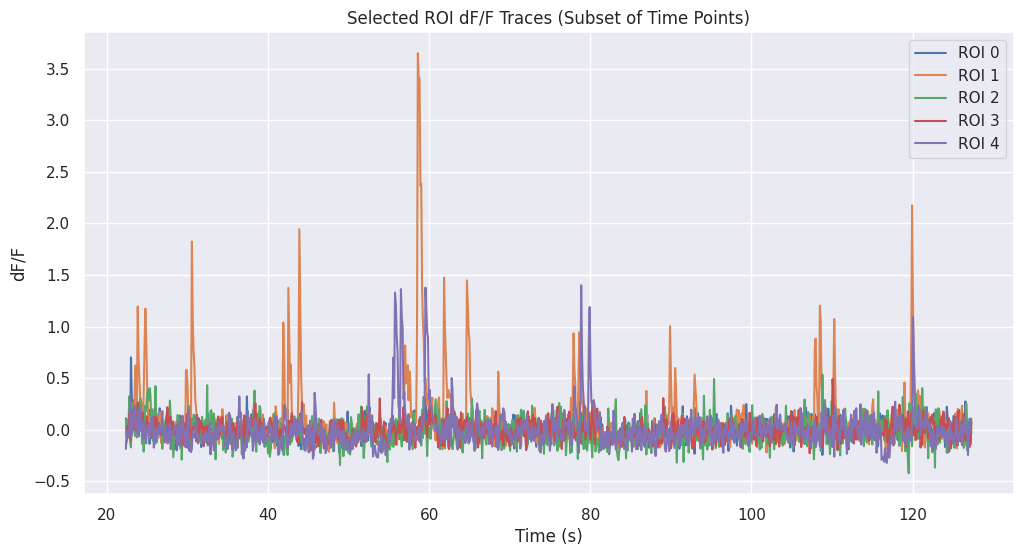

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Access DFF traces and timestamps
dff_traces = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces']
timestamps = dff_traces.timestamps[:]

# Select the first 5 ROIs to plot
num_rois_to_plot = 5
roi_indices = np.arange(num_rois_to_plot)

# Load data for the selected ROIs (taking a subset to avoid excessive memory usage)
# We'll plot the first 1000 time points for a clearer view of activity dynamics
time_points_to_plot = 1000
dff_data_subset = dff_traces.data[:time_points_to_plot, roi_indices]
timestamps_subset = timestamps[:time_points_to_plot]

# Plot the DFF traces
plt.figure(figsize=(12, 6))
for i in range(num_rois_to_plot):
    plt.plot(timestamps_subset, dff_data_subset[:, i], label=f'ROI {roi_indices[i]}')

plt.xlabel('Time (s)')
plt.ylabel('dF/F')
plt.title('Selected ROI dF/F Traces (Subset of Time Points)')
plt.legend()
plt.grid(True)
plt.show()

As seen in the plot, the dF/F traces show transient increases in fluorescence, indicative of neuronal activity. Note that we only plotted a subset of the data for demonstration purposes.

## Visualizing Running Behavior Data (Speed)

Now let's visualize the running speed of the animal over time.

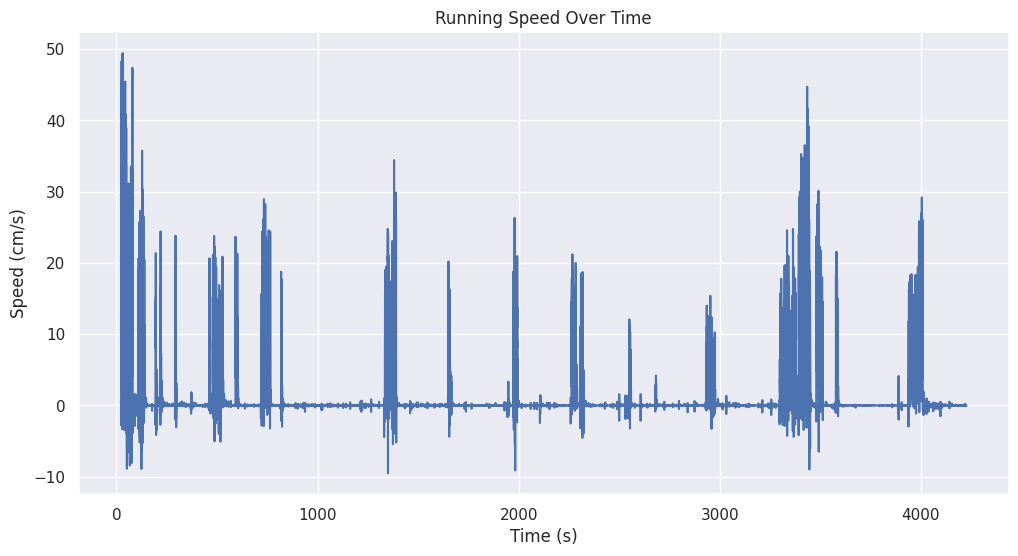

In [5]:
# Access running speed and timestamps
running_speed = nwb.processing['running'].data_interfaces['speed']
timestamps_running = running_speed.timestamps[:]
speed_data = running_speed.data[:]

# Plot the running speed
plt.figure(figsize=(12, 6))
plt.plot(timestamps_running, speed_data)

plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Running Speed Over Time')
plt.grid(True)
plt.show()

The running speed plot shows periods of activity and rest. Note the presence of some negative speed values, which might be artifacts of the measurement. For analyses, it might be appropriate to consider the absolute value or filter these out.

## Visualizing Segmented ROIs

We can also visualize the spatial masks of the segmented ROIs. These masks show the regions in the imaging plane that correspond to each identified neuron. The `mask_image_plane` indicates which imaging plane an ROI is on, particularly relevant for overlapping ROIs.

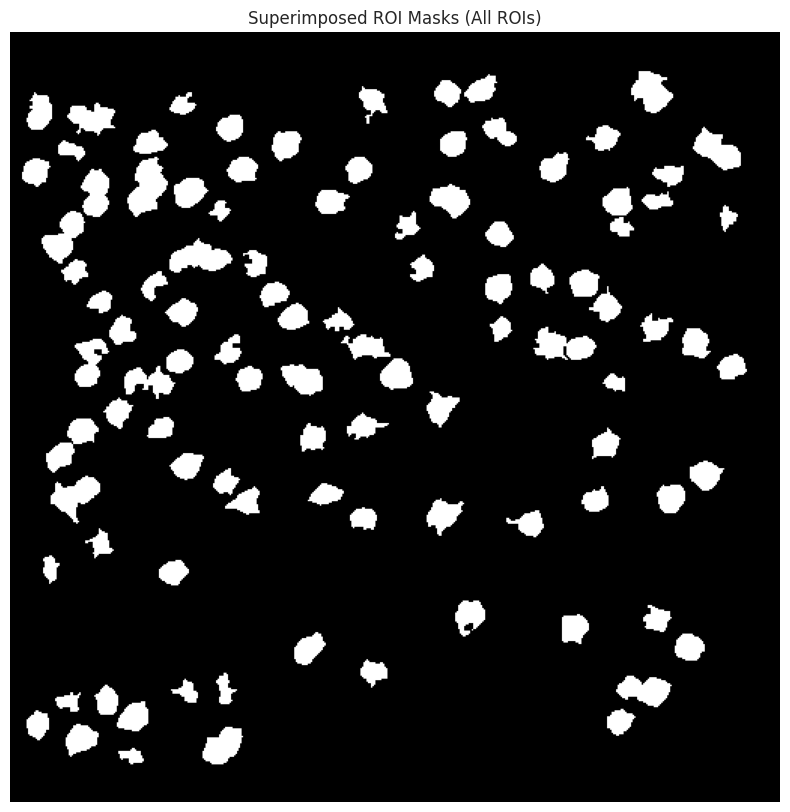

In [6]:
# Access the cell specimen table and image masks
cell_specimen_table = nwb.processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table']
image_masks = cell_specimen_table.image_mask
mask_image_planes = cell_specimen_table.mask_image_plane[:]
roi_ids = cell_specimen_table.id[:]

# Visualize all superimposed masks from all planes
all_masks = [image_masks[i] for i in range(len(image_masks))]

if all_masks:
    stacked_all_masks = np.stack(all_masks, axis=0)
    combined_all_mask = np.max(stacked_all_masks, axis=0)

    plt.figure(figsize=(10, 10)) # Increased figure size
    plt.imshow(combined_all_mask, cmap='gray')
    plt.title('Superimposed ROI Masks (All ROIs)')
    plt.axis('off')
    plt.show()

This superimposed view provides an idea of the overall density and spatial arrangement of the segmented neurons within the imaged area (VISp, 175 um depth).

## Accessing Stimulus Presentation Times

The NWB file includes intervals for stimulus presentations. We can load these into a pandas DataFrame for easier analysis.

In [7]:
# Access stimulus presentation intervals, e.g., for gray screen presentations
gray_presentations = nwb.intervals['gray_presentations']
gray_presentations_df = gray_presentations.to_dataframe()

# Display the first few rows of the dataframe
print("First 5 rows of gray_presentations dataframe:")
print(gray_presentations_df.head())

First 5 rows of gray_presentations dataframe:
    start_time  stop_time stimulus_name  stimulus_block  frame  \
id                                                               
0    34.918040  34.934720          gray             6.0    0.0   
1    34.934720  34.951401          gray             6.0    1.0   
2    34.951401  34.968082          gray             6.0    2.0   
3    34.968082  34.984762          gray             6.0    3.0   
4    34.984762  35.001443          gray             6.0    4.0   

              color  contrast  opacity  orientation              size units  \
id                                                                            
0   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
1   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
2   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
3   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
4   [1.0, 1.0, 1.

## Visualizing DFF Traces Aligned with Stimulus

Let's visualize a single ROI's dF/F trace and overlay the times when a particular stimulus (e.g., Movie Clip A) was presented to see potential responses.

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


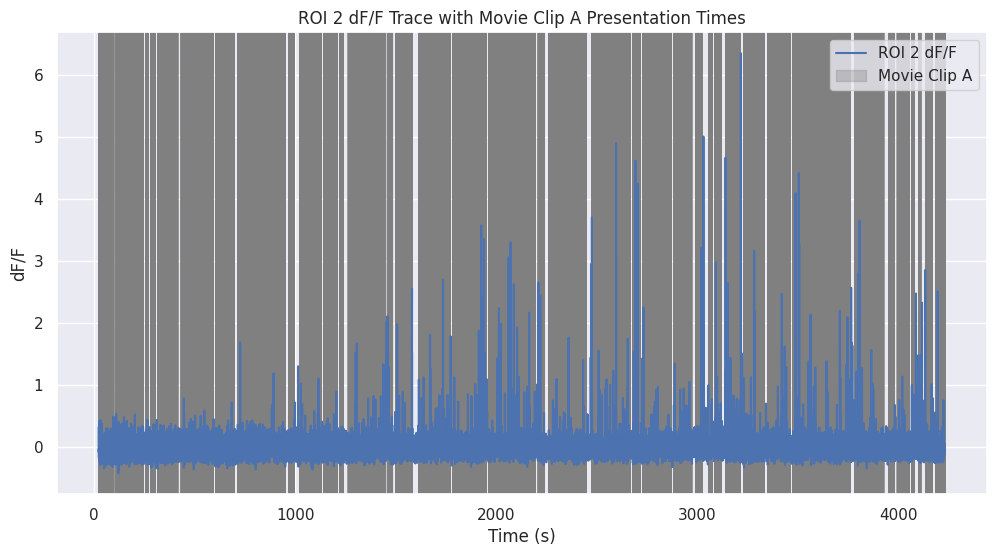

In [8]:
# Access DFF traces and timestamps
dff_traces = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces']
timestamps = dff_traces.timestamps[:]

# Select a single informative ROI (e.g., ROI 2 based on previous exploration)
roi_index_to_plot = 2
dff_data_single_roi = dff_traces.data[:, roi_index_to_plot]

# Access stimulus presentation intervals for Movie Clip A
movie_clip_A_presentations = nwb.intervals['movie_clip_A_presentations'].to_dataframe()

# Plot DFF trace and stimulus presentation times
plt.figure(figsize=(12, 6))
plt.plot(timestamps, dff_data_single_roi, label=f'ROI {roi_index_to_plot} dF/F')

# Highlight stimulus presentation times
for _, row in movie_clip_A_presentations.iterrows():
    plt.axvspan(row['start_time'], row['stop_time'], color='gray', alpha=0.3, label='Movie Clip A' if _ == 0 else "")

plt.xlabel('Time (s)')
plt.ylabel('dF/F')
plt.title(f'ROI {roi_index_to_plot} dF/F Trace with Movie Clip A Presentation Times')
plt.legend()
plt.grid(True)
plt.show()

This plot allows us to visually inspect if the selected neuron shows any activity patterns that align with the presentation of Movie Clip A.

## Correlation between Neural Activity and Running Behavior

We can explore the relationship between neuronal activity and animal behavior by calculating the correlation between a neuron's dF/F trace and the running speed.

In [9]:
# Access running speed data and timestamps
running_speed = nwb.processing['running'].data_interfaces['speed']
timestamps_running = running_speed.timestamps[:]
speed_data = running_speed.data[:]

# We need to resample the running speed data to match the timestamps of the calcium imaging data
# For simplicity, we will perform a basic nearest-neighbor interpolation.
# A more rigorous analysis might require proper alignment and resampling techniques.
from scipy.interpolate import interp1d

# Create an interpolation function for running speed
interp_speed = interp1d(timestamps_running, speed_data, kind='nearest', bounds_error=False, fill_value=0)

# Resample running speed to calcium imaging timestamps
resampled_speed = interp_speed(timestamps)

# Select the same informative ROI as before (ROI 2)
dff_data_single_roi = nwb.processing['ophys'].data_interfaces['dff'].roi_response_series['traces'].data[:, roi_index_to_plot]

# Calculate the Pearson correlation coefficient
correlation = np.corrcoef(dff_data_single_roi, resampled_speed)[0, 1]

print(f"Pearson correlation between ROI {roi_index_to_plot} dF/F and running speed: {correlation:.3f}")

Pearson correlation between ROI 2 dF/F and running speed: 0.012


A positive correlation suggests that the neuron's activity tends to increase when the animal is running. Note that this is a simple correlation and does not imply causality.

## Summary and Future Directions

This notebook demonstrated how to access and visualize key data from Dandiset 000617, including calcium imaging traces, animal running behavior, segmented neuronal ROIs, and stimulus presentation times. We also showed a basic correlation analysis between neural activity and running speed.

Possible future directions for analysis include:
- Detailed analysis of neuronal responses to different movie clips and sequences.
- Investigating how neural activity and brain regions relate to the sequence learning paradigm.
- Advanced analysis of the relationship between neuronal activity and running behavior, considering delays and nonlinearities.
- Analyzing the spatial distribution and functional clustering of active neurons.
- Further exploration of the `event_detection` data interface and identified neural events.
- Comparing data across different recording sessions and mice within the Dandiset to study learning-related changes.

In [10]:
# Close the NWB file
io.close()

In [11]:
# Close the NWB file
io.close()